In [2]:
import pandas as pd

In [5]:
df_train = pd.read_csv('../5_16/train.tsv', sep='\t')
# df_train.head()
df_test = pd.read_csv('../5_16/test.tsv', sep='\t')
df_test

,id,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,1,1990,0,0,546,1225,133,0,53,21007,0.869048,2208.218750,90.363636,2.500000,0.121212
1,4,601,0,0,948,368,212,0,32,26934,0.612211,292.957143,65.829787,2.000000,0.609929
2,5,17,0,0,301,39,1,0,5,25497,0.879310,116383.545455,98.666667,1.000000,0.083333
3,6,271,0,0,126,62,3,0,2,70240,0.741379,24589.039682,75.204724,3.000000,0.157480
4,8,8,1,0,960,146,24,0,0,12162,0.500000,32.428571,35.750000,1.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,3167,1179,1,0,1743,792,336,1,30,39072,0.780886,4768.979798,119.670000,1.689655,0.400000
1584,3168,125,0,0,429,2356,23,0,261,39527,0.735931,17054.462963,106.935780,3.606061,0.587156
1585,3169,148,0,0,861,226,12,0,9,39263,0.636042,12397.927928,81.357143,1.777778,0.589286
1586,3172,1065,0,0,929,263,2866,0,15,58959,0.871287,16775.045454,111.347826,1.333333,0.521739


In [12]:
train_x = df_train.drop(['id','bot'], axis=1)
train_y = df_train['bot']
test_x = df_test.drop(['id'], axis=1)

In [19]:
# train_x.info()
train_x.shape

(1588, 14)

In [20]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   statuses_count            1588 non-null   int64  
 1   default_profile           1588 non-null   int64  
 2   default_profile_image     1588 non-null   int64  
 3   friends_count             1588 non-null   int64  
 4   followers_count           1588 non-null   int64  
 5   favourites_count          1588 non-null   int64  
 6   geo_enabled               1588 non-null   int64  
 7   listed_count              1588 non-null   int64  
 8   account_age_hours         1588 non-null   int64  
 9   diversity                 1588 non-null   float64
 10  mean_mins_between_tweets  1588 non-null   float64
 11  mean_tweet_length         1588 non-null   float64
 12  mean_retweets             1588 non-null   float64
 13  reply_rate                1588 non-null   float64
dtypes: float

In [14]:
train_x.describe()

,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
count,1588.000000,1588.000000,1588.000000,1588.000000,1.588000e+03,1588.000000,1588.000000,1588.000000,1588.000000,1588.000000,1.588000e+03,1588.000000,1588.000000,1588.000000
mean,3188.091310,0.294710,0.030856,1595.297229,2.909536e+03,1005.797859,0.447733,84.814232,43666.015743,0.676168,1.419424e+04,92.204547,2.918117,0.343931
std,8297.720077,0.456056,0.172983,12335.033788,3.391030e+04,4246.563718,0.497417,369.136188,17798.660934,0.141481,5.496563e+04,19.779600,19.489098,0.248255
min,0.000000,0.000000,0.000000,16.000000,1.000000e+00,0.000000,0.000000,0.000000,2744.000000,0.005000,-1.565449e+01,13.166667,1.000000,0.000000
25%,198.500000,0.000000,0.000000,303.500000,9.975000e+01,16.000000,0.000000,4.000000,30575.500000,0.625356,1.114957e+03,81.116807,1.166667,0.119915
50%,773.500000,0.000000,0.000000,635.000000,3.140000e+02,131.500000,0.000000,16.500000,47456.000000,0.693826,3.637171e+03,92.612121,1.651598,0.328980
75%,2682.750000,1.000000,0.000000,1229.000000,8.732500e+02,606.750000,1.000000,54.250000,56539.750000,0.762894,1.011626e+04,104.077862,2.451136,0.541176
max,137264.000000,1.000000,1.000000,373374.000000,1.141862e+06,113640.000000,1.000000,9491.000000,78841.000000,1.000000,1.139015e+06,287.875912,767.588235,1.000000


array([[<Axes: title={'center': 'statuses_count'}>,
        <Axes: title={'center': 'default_profile'}>,
        <Axes: title={'center': 'default_profile_image'}>,
        <Axes: title={'center': 'friends_count'}>],
       [<Axes: title={'center': 'followers_count'}>,
        <Axes: title={'center': 'favourites_count'}>,
        <Axes: title={'center': 'geo_enabled'}>,
        <Axes: title={'center': 'listed_count'}>],
       [<Axes: title={'center': 'account_age_hours'}>,
        <Axes: title={'center': 'diversity'}>,
        <Axes: title={'center': 'mean_mins_between_tweets'}>,
        <Axes: title={'center': 'mean_tweet_length'}>],
       [<Axes: title={'center': 'mean_retweets'}>,
        <Axes: title={'center': 'reply_rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

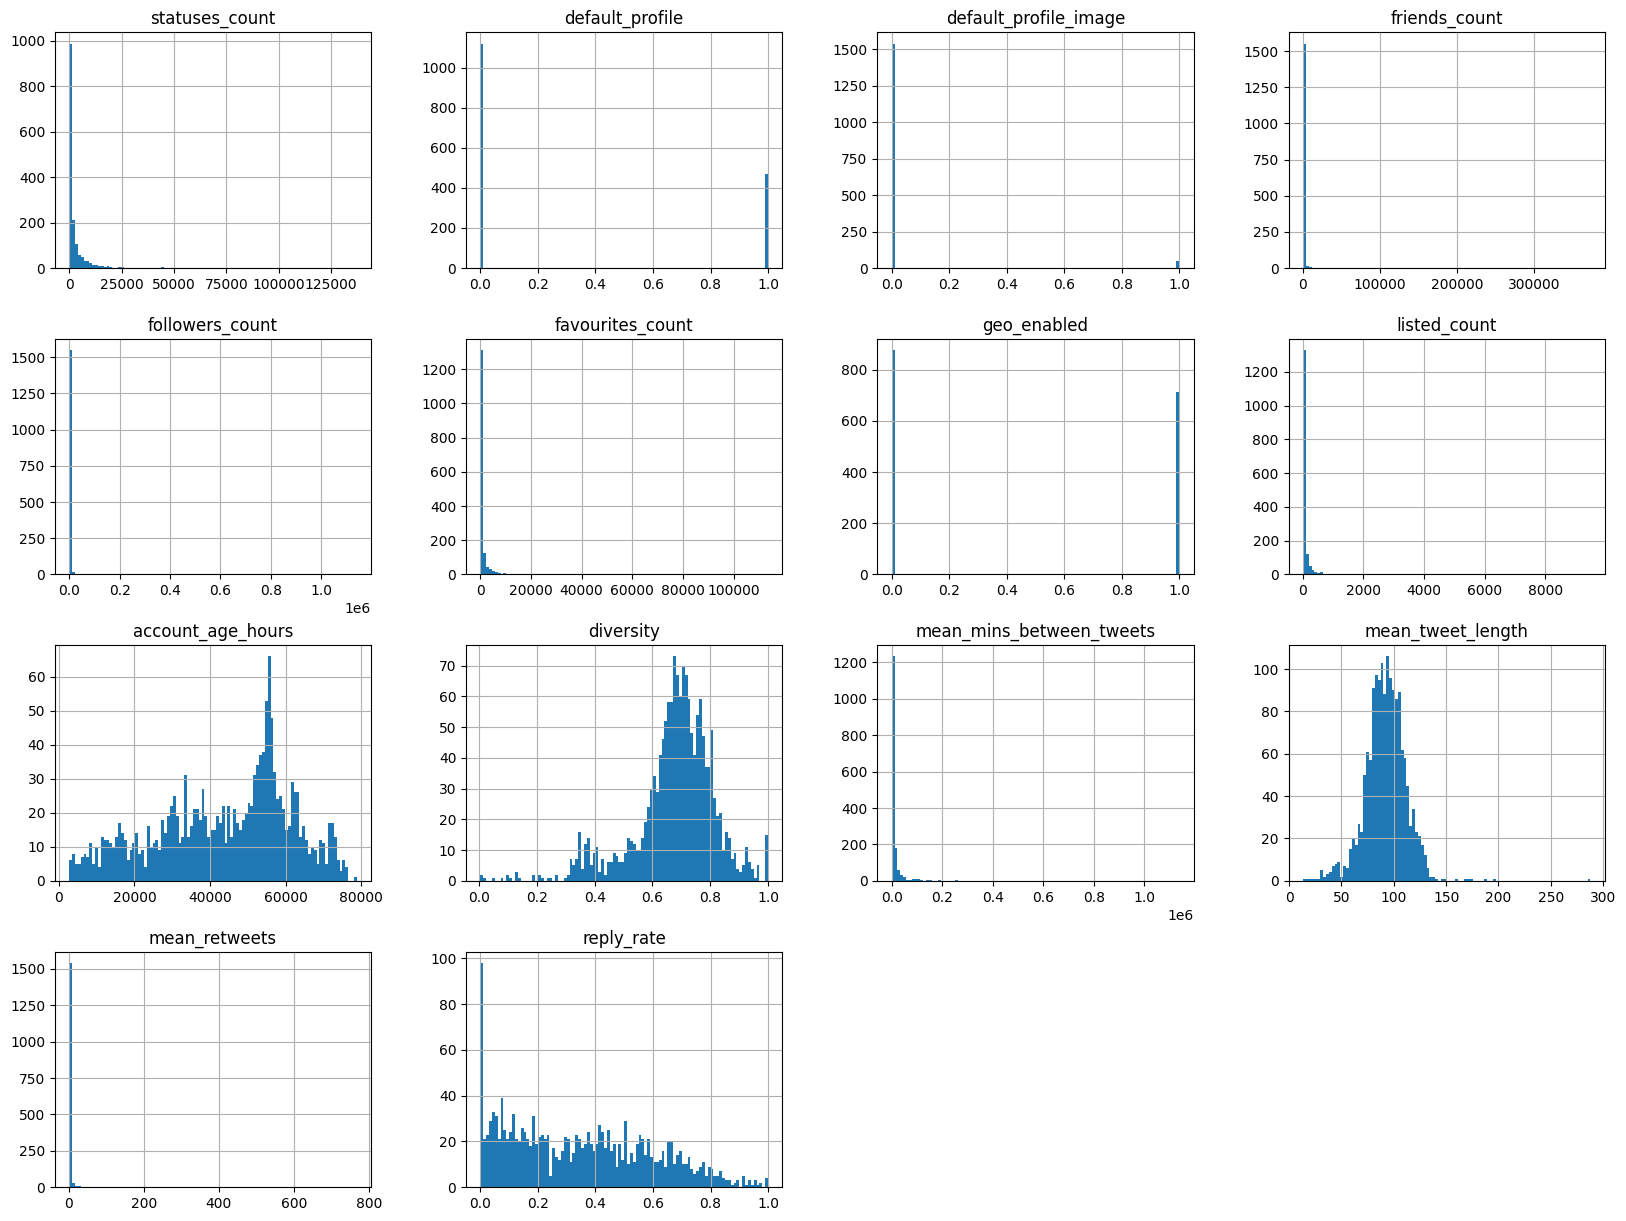

In [28]:
train_x.hist(bins=100, figsize=(20,15))